# Lesson/Article 07 - Book Recommendation

**Author: Gabriel Moretti de Souza - 200018205**

**Author's GitHub username: MorettiGS**

## HuggingFace

The following is the link for the HuggingFace space regarding this notebook:

[HugginFace - HeartDiseasePredictor](https://huggingface.co/spaces/MorettiGS/HeartDiseasePredictor)

## Objective

In this article, we are going through the creation and usage of a **identifier** using Artificial Intelligence, with the main purpose of training it to determine if a person has any heart disease or not.

For the creation of said predictor, we will be creating a neural network with the help of random forests that is capable of identifying said heart diseases based on 17 columns of data from the kaggle dataset [Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease), **on which we will select the 2020 data csv "heart_2020_cleaned.csv"**.

This search and results could be useful, in a real life situation, when trying to determine, even with little chance, if a person has any heart diseases or not.

## Pre-requisites

Previous downloads that were necessary for all dependencies used on the notebook:

In [50]:
# !pip install --upgrade pip setuptools wheel
# !pip install p5py
# !pip install PEP517
# !pip install gcc
# !pip install pandas
# !pip install kaggle
# !pip install opendatasets
# !pip install torch
# !pip install fastai
# !pip install scikit-learn

Before going any further, it is essential that we get the necessary dependencies for the AI training, and these can be found in the Python libraries imported with the code below:

In [1]:
import opendatasets as od # Responsible for dataset download
import numpy as np # Responsible for linear algebra
import pandas as pd # Responsible for data processing and manipulation
import pickle # Responsible for model exporting
from fastai.collab import *
from fastai.tabular.all import *
from sklearn.preprocessing import LabelEncoder

## Data Preprocessing

Now we can work on the data that will be used on this AI training. As said before, the data will be obtained by the use of the kaggle dataset. We can download it as follows, using the username and key from kaggle:

In [37]:
od.download(
    "https://www.kaggle.com/datasets/mustafayazici/goodbooks-10k-rating-and-description/data")

# Downloading it by kaggle username and key, or simply download it and add it to the directory

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  gmorettis


Your Kaggle Key:

  ········


100%|██████████████████████████████████████| 33.7M/33.7M [00:04<00:00, 7.49MB/s]


Then, the dataset's columns can be seen organized as follows:

In [2]:
df = pd.read_csv('goodbooks-10k-rating-and-description/ratings.csv')
df

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


### Treating Data

In [4]:
# Changing names of the columns
column_mapping = {
    'user_id': 'user',
    'book_id': 'item',
    'rating': 'rating'
}

# Use the rename method to rename columns
df.rename(columns=column_mapping, inplace=True)
df.head()

,user,item,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [5]:
# Getting smaller amount of data
ratings = df.iloc[:1000000]
ratings

,user,item,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
999995,8264,3180,5
999996,2157,1682,4
999997,9573,1839,3
999998,11700,1276,5


In [6]:
def crosstab(ratings, max_nan_user=100000, max_nan=100000):
    ctdf = pd.crosstab(ratings.user, ratings.item,values=ratings.rating, aggfunc=np.sum);ctdf

    null_cont_serie = ctdf.isnull().sum(axis = 0);

    ctdf = ctdf[null_cont_serie[null_cont_serie<=max_nan_user].index]
    
    ctdf = ctdf.dropna(axis = 0, how = 'all')

    user_null_cont_serie = ctdf.isnull().sum(axis = 1)
    ctdf = ctdf.loc[:, :ctdf.shape[1] - 7633]
    ctdf = ctdf.loc[user_null_cont_serie[user_null_cont_serie<max_nan].index]
    return ctdf

In [7]:
# Getting crosstab for ratings
cross = crosstab(ratings)
cross

/tmp/ipykernel_499532/922427526.py:2: FutureWarning: The provided callable <function sum at 0x7fb7f67b1480> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ctdf = pd.crosstab(ratings.user, ratings.item,values=ratings.rating, aggfunc=np.sum);ctdf


item,1,2,3,4,5,6,7,8,9,10,...,66,67,68,69,70,71,72,73,74,75
user,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,...,4.0,3.0,NaN,NaN,5.0,NaN,3.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,NaN,4.0,4.0,NaN,4.0,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22351,NaN,4.0,NaN,NaN,NaN,NaN,5.0,NaN,3.0,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
24420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37076,NaN,5.0,3.0,4.0,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Ordering rows by most non-NaN values
row_counts = cross.count(axis=1)

# Add a new column with the count of non-NaN values
cross['non_nan_count'] = row_counts

# Sort the DataFrame based on the number of non-NaN values in each row
cross_sorted = cross.sort_values(by='non_nan_count', ascending=False)

# Drop the temporary column used for sorting and show result
cross_sorted = cross_sorted.drop(columns='non_nan_count')
cross_sorted

item,1,2,3,4,5,6,7,8,9,10,...,66,67,68,69,70,71,72,73,74,75
user,,,,,,,,,,,,,,,,,,,,,
14889,2.0,4.0,3.0,2.0,3.0,NaN,4.0,4.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,3.0,4.0,2.0,1.0,4.0
13925,5.0,5.0,1.0,3.0,5.0,NaN,3.0,2.0,5.0,2.0,...,2.0,NaN,1.0,NaN,1.0,2.0,5.0,NaN,NaN,5.0
9485,5.0,5.0,5.0,NaN,4.0,NaN,5.0,5.0,5.0,5.0,...,5.0,4.0,NaN,NaN,4.0,4.0,3.0,NaN,NaN,5.0
8750,NaN,5.0,5.0,4.0,5.0,NaN,4.0,4.0,4.0,5.0,...,2.0,NaN,NaN,NaN,4.0,4.0,5.0,NaN,NaN,5.0
12946,NaN,5.0,4.0,5.0,5.0,NaN,5.0,4.0,NaN,5.0,...,NaN,5.0,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Trimming rows to a smaller size
cross_trim = cross_sorted.iloc[:-12000, :]
cross_trim

item,1,2,3,4,5,6,7,8,9,10,...,66,67,68,69,70,71,72,73,74,75
user,,,,,,,,,,,,,,,,,,,,,
14889,2.0,4.0,3.0,2.0,3.0,NaN,4.0,4.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,3.0,4.0,2.0,1.0,4.0
13925,5.0,5.0,1.0,3.0,5.0,NaN,3.0,2.0,5.0,2.0,...,2.0,NaN,1.0,NaN,1.0,2.0,5.0,NaN,NaN,5.0
9485,5.0,5.0,5.0,NaN,4.0,NaN,5.0,5.0,5.0,5.0,...,5.0,4.0,NaN,NaN,4.0,4.0,3.0,NaN,NaN,5.0
8750,NaN,5.0,5.0,4.0,5.0,NaN,4.0,4.0,4.0,5.0,...,2.0,NaN,NaN,NaN,4.0,4.0,5.0,NaN,NaN,5.0
12946,NaN,5.0,4.0,5.0,5.0,NaN,5.0,4.0,NaN,5.0,...,NaN,5.0,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,NaN,4.0,2.0,5.0,4.0,NaN,4.0,5.0,NaN,NaN,...,NaN,5.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN
7375,NaN,5.0,1.0,5.0,2.0,NaN,3.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0
14564,NaN,2.0,1.0,4.0,5.0,NaN,1.0,3.0,NaN,3.0,...,1.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN


In [10]:
# Verifying number of NaN values
cross_trim.isna().sum()

item
1     338
2      18
3      87
4      81
5     121
     ... 
71    270
72    368
73    463
74    563
75    302
Length: 74, dtype: int64

## Creating DataLoaders

In [11]:
books = pd.read_csv('goodbooks-10k-rating-and-description/goodbooks_10k_rating_and_description.csv')
books

,book_id,book_title,book_series,title,book_authors,genres,book_score,book_rating,book_rating_obj,book_rating_count,...,book_pages_obj,books_count,books_count_obj,goodreads_book_id,book_isbn,isbn,isbn13,image_url_x,image_url_y,small_image_url
0,1,The Hunger Games,"The Hunger Games, #1","The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Young Adult|Fiction|Science Fiction|Dystopia|Fantasy|Science Fiction,1.000000e+00,4.33,4.0,5519135,...,3.0,272,14.0,2767052,9.780440e+12,439023483,9.780439e+12,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603l/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg
1,2,Harry Potter and the Philosopher's Stone,"Harry Potter, #1","Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","J.K. Rowling, Mary GrandPré",NaN,8.245693e-01,4.44,4.0,6682936,...,NaN,491,15.0,3,NaN,439554934,9.780440e+12,https://images.gr-assets.com/books/1474154022m/3.jpg,NaN,https://images.gr-assets.com/books/1474154022s/3.jpg
2,3,Twilight,"Twilight, #1","Twilight (Twilight, #1)",Stephenie Meyer,Young Adult|Fantasy|Romance|Paranormal|Vampires|Fiction|Fantasy|Paranormal,2.902011e-02,3.58,3.5,4281268,...,4.0,226,14.0,41865,9.780320e+12,316015849,9.780316e+12,https://images.gr-assets.com/books/1361039443m/41865.jpg,https://images.gr-assets.com/books/1361039443l/41865.jpg,https://images.gr-assets.com/books/1361039443s/41865.jpg
3,4,To Kill a Mockingbird,-,To Kill a Mockingbird,Harper Lee,Classics|Fiction|Historical|Historical Fiction|Academic|School,2.310594e-01,4.27,4.0,3745197,...,3.0,487,15.0,2657,9.780060e+12,61120081,9.780061e+12,https://images.gr-assets.com/books/1361975680m/2657.jpg,https://images.gr-assets.com/books/1361975680l/2657.jpg,https://images.gr-assets.com/books/1361975680s/2657.jpg
4,5,The Great Gatsby,-,The Great Gatsby,F. Scott Fitzgerald,Classics|Fiction|Academic|School|Literature|Historical|Historical Fiction|Romance|Novels|Academic|Read For School|Young Adult|High School|Literature|American,4.942671e-02,3.90,3.5,3141842,...,1.0,1356,15.0,4671,NaN,743273567,9.780743e+12,https://images.gr-assets.com/books/1490528560m/4671.jpg,https://images.gr-assets.com/books/1490528560l/4671.jpg,https://images.gr-assets.com/books/1490528560s/4671.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,9996,Bayou Moon,"The Edge, #2","Bayou Moon (The Edge, #2)",Ilona Andrews,Fantasy|Urban Fantasy|Fantasy|Romance|Fantasy|Paranormal|Romance|Paranormal Romance|Fantasy|Magic,5.206229e-06,4.10,4.0,21145,...,4.0,19,4.0,7130616,9.780440e+12,441019455,9.780441e+12,https://images.gr-assets.com/books/1307445460m/7130616.jpg,https://images.gr-assets.com/books/1307445460l/7130616.jpg,https://images.gr-assets.com/books/1307445460s/7130616.jpg
9790,9997,Means of Ascent,"The Years of Lyndon Johnson, #2","Means of Ascent (The Years of Lyndon Johnson, #2)",Robert A. Caro,NaN,1.744859e-06,4.25,4.0,18269,...,NaN,19,4.0,208324,NaN,067973371X,9.780680e+12,https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png,NaN,https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf249278a81aabab721ef782c4a74.png
9791,9998,The Mauritius Command,-,The Mauritius Command,Patrick O'Brian,Historical|Historical Fiction|Fiction|Historical|Adventure,8.571567e-07,4.35,4.0,11785,...,3.0,60,7.0,77431,9.780390e+12,039330762X,9.780393e+12,https://images.gr-assets.com/books/1455373531m/77431.jpg,https://images.gr-assets.com/books/1455373531l/77431.jpg,https://images.gr-assets.com/books/1455373531s/77431.jpg
9792,9999,Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture,-,Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture,Peggy Orenstein,Nonfiction|Parenting|Feminism|Psychology|Sociology|Gender,1.661903e-06,3.66,3.5,12811,...,2.0,7,2.0,8565083,9.780060e+12,61711527,9.780062e+12,https://images.gr-assets.com/books/1279214118m/8565083.jpg,https://ima

In [12]:
books = books.iloc[:, :2]
books.head()

,book_id,book_title
0,1,The Hunger Games
1,2,Harry Potter and the Philosopher's Stone
2,3,Twilight
3,4,To Kill a Mockingbird
4,5,The Great Gatsby


In [13]:
# Changing names of the columns
column_mapping = {
    'book_id': 'item',
    'book_title': 'title'
}

# Use the rename method to rename columns
books.rename(columns=column_mapping, inplace=True)
books.head()

,item,title
0,1,The Hunger Games
1,2,Harry Potter and the Philosopher's Stone
2,3,Twilight
3,4,To Kill a Mockingbird
4,5,The Great Gatsby


In [16]:
ratings = ratings.merge(books)
ratings

,user,item,rating,title
0,1,258,5,La sombra del viento
1,11,258,3,La sombra del viento
2,143,258,4,La sombra del viento
3,242,258,5,La sombra del viento
4,325,258,4,La sombra del viento
...,...,...,...,...
988700,9379,1001,3,Het diner
988701,11804,8778,2,Tyskungen
988702,12377,7192,5,Ruthless
988703,5978,7229,4,Dead End in Norvelt


In [17]:
dls = CollabDataLoaders.from_df(ratings.iloc[:100000], item_name='title', bs=64)
dls.show_batch()

/home/gabriel/.local/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


,user,title,rating
0,11183,Le Comte de Monte-Cristo,5
1,1240,O Alquimista,2
2,9726,Where the Wild Things Are,4
3,3812,Brave New World,1
4,14379,Harry Potter and the Chamber of Secrets,5
5,6084,A Prayer for Owen Meany,3
6,5642,Franz Kafka's The Castle,1
7,6971,The Book Thief,4
8,3532,A Prayer for Owen Meany,4
9,8593,The Sun Also Rises,4


In [20]:
n_users  = len(dls.classes['user'])
n_books = len(dls.classes['title'])
n_factors = 50
n_users

10902

In [21]:
n_books

85

10902

In [22]:
# DotProduct Function
class DotProduct(Module):
    def __init__(self, n_users, n_books, n_factors):
        self.user_factors = Embedding(n_users, n_factors)
        self.books_factors = Embedding(n_books, n_factors)

    def forward(self, x):
        users = self.user_factors(x[:,0])
        books = self.books_factors(x[:,1])
        return (users * books).sum(dim=1)

In [23]:
model = DotProduct(n_users, n_books, 5)
learn = Learner(dls, model, loss_func=MSELossFlat())

In [ ]:
learn.fit_one_cycle(5, 5e-3)

/home/gabriel/.local/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,time
0,9.003972,8.004643,00:05
1,1.706437,1.690673,00:06
2,1.148296,1.339460,00:05
3,1.032539,1.224524,00:06
4,0.853457,1.216385,00:06


/home/gabriel/.local/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/home/gabriel/.local/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/home/gabriel/.local/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/home/gabriel/.local/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/home/gabriel/.local/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/home

In [12]:
# DotProduct Function
class DotProduct(Module):
    def __init__(self, n_users, n_books, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.books_factors = Embedding(n_books, n_factors)
        self.y_range = y_range

    def forward(self, x):
        users = self.user_factors(x[:,0])
        books = self.books_factors(x[:,1])
        return sigmoid_range((users * books).sum(dim=1), *self.y_range)

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeEstimate         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

And this is the size of the dataset, with 319795 lines and 18 columns:

In [13]:
df.shape

(319795, 18)

## Creating Model with Random Forest

With the given data, we can now start creating our model. For that, we will be using the Random Forest algorithm.

A Random Forest is a learning algorithm that builds multiple decision trees and merges them together to get a more accurate and stable prediction.

Each decision tree in the forest is constructed using a random subset of the training data and a random subset of the features. This randomness helps to introduce diversity among individual trees, increasing the overall performance of the model.

### Creating test and training data

We can start by separating our data in two sections, one for the independent columns and one for the dependent column, each of them with their own train and test data, as can be seen below:

In [14]:
# Separating the dataset into X (train and test) and y (traing and test)
# X represents the independent columns, whereas y represents the only dependent column (HeartDisease)
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

For an example, we can see the first row of each split using 'iloc', as follows:

In [15]:
X_train.iloc[0]

BMI                 23.33
Smoking              1.00
AlcoholDrinking      0.00
Stroke               0.00
PhysicalHealth       0.00
MentalHealth         0.00
DiffWalking          0.00
Sex                  1.00
AgeEstimate         75.00
Race                 1.00
Diabetic             0.00
PhysicalActivity     1.00
GenHealth            4.00
SleepTime            7.00
Asthma               0.00
KidneyDisease        0.00
SkinCancer           0.00
Name: 95877, dtype: float64

In [16]:
X_test.iloc[0]

BMI                 27.63
Smoking              1.00
AlcoholDrinking      0.00
Stroke               0.00
PhysicalHealth       0.00
MentalHealth        25.00
DiffWalking          0.00
Sex                  0.00
AgeEstimate         25.00
Race                 5.00
Diabetic             0.00
PhysicalActivity     1.00
GenHealth            4.00
SleepTime            7.00
Asthma               0.00
KidneyDisease        0.00
SkinCancer           0.00
Name: 271884, dtype: float64

In [17]:
y_train.iloc[0]

0

In [18]:
y_test.iloc[0]

0

### Classifier Creation (Random Forest)

As noted before, we will now start the creation of the Random Forest as a classifier.

The function RandomForestClassifier is responsible for doing exactly that. We can start creating our model as follows:

In [19]:
model = RandomForestClassifier(150, min_samples_leaf=5)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, n_estimators=150)

In the code seen above, we use the specified function, where the arguments are described as follows:

- n_estimators: represents the number of decision trees in the forest. Raising this value can make for a more robust and solid model.

- min_samples_leaf: controls the minimal number of samples necessary for the creation of a decision tree, where each leaf has to achieve the minimal for the tree to be created. Makes sure the trees do not adjust too much to the given training data.

With both those parameters, the function is responsible for controlling the model's complexity and overfitting.

### Prediction

With the usage of the created model, it is possible to make a prediction on the test data using the predict() function, as follows:

In [20]:
# Using X_test data in the model, achieving the result y_pred
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

Now, just making sure the values are not all zero, we can count the number of appearances of each value:

In [21]:
# Storing unique values and its quantities
unique_values, counts = np.unique(y_pred, return_counts=True)

In [22]:
# Showing unique values
unique_values

array([0, 1])

In [23]:
# Showing quantities
counts

array([63277,   682])

In [38]:
# Showing results data
results = y_test==y_pred
results[:50]

271884     True
270361     True
219060     True
24010      True
181930     True
24149     False
185683     True
316656     True
305719     True
56786      True
240362     True
166773     True
156799     True
259623     True
220344     True
189010     True
301058     True
156366     True
42895      True
199052     True
221416     True
235723    False
223475     True
326        True
299663     True
75739      True
231975     True
36369      True
230715     True
142340     True
210513     True
968       False
227857     True
29693     False
223339     True
306225     True
154015     True
239020     True
265163     True
187674     True
182226     True
231958     True
199131     True
199866     True
22980      True
17826      True
47898     False
67985      True
89189      True
219846     True
Name: HeartDisease, dtype: bool

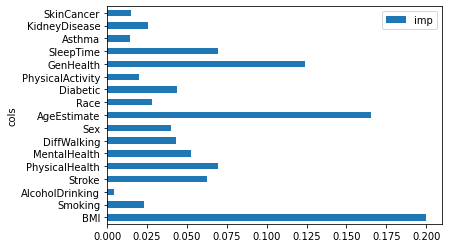

In [36]:
# Showing relevance
pd.DataFrame(dict(cols=X_train.columns, imp=model.feature_importances_)).plot('cols', 'imp', 'barh');

### MAE (Mean Absolut Error)

The Mean Absolute Error (MAE) is a metric commonly used on predictive models to measure the average absolute differences between predicted and actual values.

In simpler terms, for each observation on a list, you calculate the absolute difference between the predicted value and the actual value, and then take the average of these absolute differences across all observations.

To find the Mean Absolut Error of this model, the  we can do as follows:

In [24]:
# Calculating MAE with the sklearn function mean_absolute_error, taking 2 arrays as parameters
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.10f} ~ {mae*100:.5f}%')

Mean Absolute Error (MAE): 0.0858675089 ~ 8.58675%


In [33]:
# Showing accuracy
acc = accuracy_score(y_test, y_pred)
acc

0.9141324911271284

## Saving model for use

The following code saves our model into a new file "model.pkl", enabling it for future usage:

In [25]:
# Save trained model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)